# **Data Jobs Salaries in February 2023 in Mexico** (Part 2)
____


Author: **Daniel Eduardo López**

**09/02/2023**

<a href="https://www.linkedin.com/in/daniel-eduardo-lopez"><font size="-1">LinkedIn</font></a> 

<a href="https://github.com/DanielEduardoLopez"><font size="-1">GitHub </font></a>

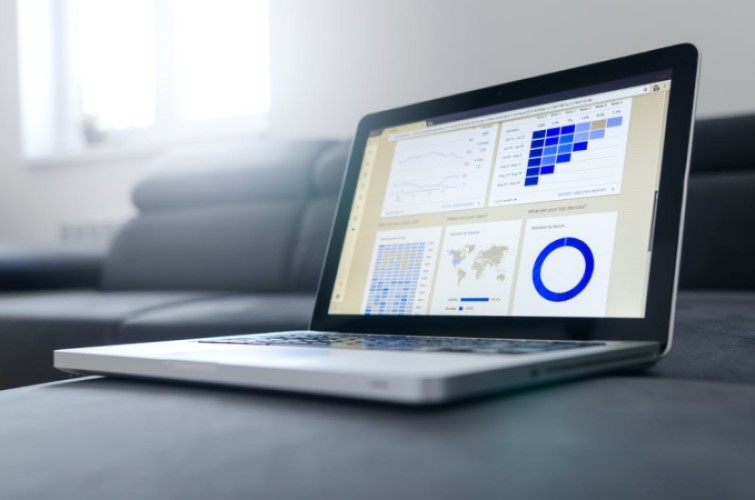

<font size="-1">Image Credit: <a href="https://www.pexels.com/es-es/foto/foto-de-primer-plano-del-portatil-gris-577210/"> Lukas </a></font>

___
## **1. Introduction**
___

With the emergence of the big data, new jobs have appeared demanding new sets of skills and expertise for extracting value from data (Axis Talent, 2020):

- Business Analysts (BA)
- Data Analysts (DA)
- Data Architects (DR) 
- Data Engineers (DE) 
- Data Scientists (DS)

Which one is the most valued in the Mexican labor market currently?

____
#### **General Objective**
To identify which data job category has the highest salary in the Mexican labor market in February 2023 according to the OCC website.
____
#### **Research Question**
Which data job category has the highest salary in the Mexican labor market in February 2023 according to the OCC website?
____
#### **Hypothesis**
The **Data Scientist** position has the highest salary in the Mexican labor market in February 2023 according to the OCC website.
____
#### **Abridged Methodology**
The methodology of the present study is based on Rollin’s Foundational Methodology for Data Science (Rollins, 2015).

1. **Analytical approach**: Descriptive and inferential statistics.
2. **Data requirements**: Data about job positions such as job name, salary, employer and location.
3. **Data collection**: Data was collected from the OCC Website (Mexico) on 07 February 2022, through web scraping with Python 3 and its libraries Selenium and BeautifulSoup.
4. **Data exploration and preparation**: Data then was explored and cleaned with Python 3 and its libraries Pandas and Numpy. 
5. **Data analysis**: Data was analyzed with Python 3 and its libraries Pandas, Scipy and Statsmodels and visualized with Matplotlib, Seaborn, Folium and Plotly. 
6. **Statistical analysis**: The D'Agostino-Pearson normality test was used to assess the normality of the data jobs salary distribution. Then, both parametric (ANOVA and t-test with unequal variance) and non-parametric (Mann-Whitney U and Kruskal-Wallis H) tests were carried out to assess the significance of the obtained results.

Furthermore:

7. A **dashboard** was built with Python 3 and its libraries Plotly and Dash.
8. A **final report** was written with the complete results obtained from the data.
9. Some **slides** were prepared with the **most important insights** from the report.

___
#### **Notebook's Goal**

In this context, the purpose of the present notebook is to perform the process of **data exploration, data preparation, data analysis, data visualization as well as the statistical analysis**.
___

In [ ]:
# Loading Requirements Text File
#!pip install -r requirements.txt

In [ ]:
# Libraries importation
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
import seaborn as sns

In [ ]:
# Setting theme and plot resolution
sns.set_theme(context = 'notebook', style = 'darkgrid')
mpl.rcParams["figure.dpi"] = 100
mpl.rcParams["savefig.dpi"] = 300
set_matplotlib_formats('svg')

# Setting default plot's aesthetics
plotfontcolor = 'dimgray'
mpl.rcParams['text.color'] = plotfontcolor
mpl.rcParams['axes.labelcolor'] = plotfontcolor
mpl.rcParams['xtick.color'] = plotfontcolor
mpl.rcParams['ytick.color'] = plotfontcolor
mpl.rcParams["font.size"] = 10
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
mpl.rcParams["axes.labelweight"] = "bold"
mpl.rcParams["axes.titleweight"] = "bold"
#mpl.rcParams['font.family'] = 'sans-serif'
#mpl.rcParams['font.family'] = 'serif'

___
## **2. Data Exploration (EDA)**
___

Firstly, the data collected from the web scraping process was loaded to a Pandas dataframe. Then, the dataset was explored with the Pandas and Seaborn libraries to gain some understanding and preliminary insights.


In [ ]:
# Data importation
df = pd.read_csv('https://raw.githubusercontent.com/DanielEduardoLopez/DataJobsMX2023/main/Dataset.csv')
df.head(10)

,Job,Salary,Company,Location
0,ANALISTA DE DATOS,Sueldo no mostrado por la empresa,NaN,"Cuautitlán Izcalli, Edo. Méx.​"
1,ANALISTA DE DATOS,Sueldo no mostrado por la empresa,Hitss,CDMX
2,Analista de Datos,"$20,000 - $25,000 Mensual",Aceros Levinson S.A. d...,"Monterrey, N.L."
3,Analista de datos (por incapacidad),"$17,000 - $18,000 Mensual",Sky,"Benito Juárez, CDMX"
4,Analista de Datos y Costos,"$15,000 - $18,000 Mensual",NaN,"San Miguel de Allende, Gto."
5,Analista de Datos Bussines Intelligence,Sueldo no mostrado por la empresa,Comercializadora de Va...,"Guadalajara, Jal."
6,Analista de datos maestros SAP,Sueldo no mostrado por la empresa,"Productos Verde Valle,...","Zapopan, Jal."
7,Analista base de datos,"$30,000 - $35,000 Mensual",Servicios TVM de Méxic...,"Miguel Hidalgo, CDMX"
8,Bases de Datos Analista,"$15,000 Mensual","Manpower, S.A. de C.V.","San Luis Potosí, SLP."
9,Analista de Base de Datos,"$15,000 - $16,000 Mensual",Grupo Daisa,"Cuauhtémoc, CDMX"


It can be observed that **data lacks consistency** in every variable. Some observations are in uppercase, some values are abbreviations, there is no salary value for each tuple, some observations do not correspond to data jobs, etc. Thus, it is necessary to clean the data. Nonetheless, some further exploration will be carried out to develop a more complete strategy for doing so.

In [ ]:
# Basic dataset description
df.describe()

,Job,Salary,Company,Location
count,1292,1292,1061,1237
unique,899,249,439,181
top,Analista de Tecnología de Datos para Contac Ce...,Sueldo no mostrado por la empresa,"Manpower, S.A. de C.V.",CDMX
freq,12,655,46,289


All of the variables are strings. This is expectable for the **Job**, **Company**, and **Location** variables; but no for **Salary**, which must be appropriately wrangled.

In [ ]:
# Basic dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Job       1292 non-null   object
 1   Salary    1292 non-null   object
 2   Company   1061 non-null   object
 3   Location  1237 non-null   object
dtypes: object(4)
memory usage: 40.5+ KB


From the results above it can be seen that the variables **Job** and **Salary** do not exhibit null values, while **Company** and **Location** do. Indeed, in some cases the organization offering the vacancy prefers to remain confidential. 

In [ ]:
# Value counts for each job position
df[['Job']].value_counts()

Job                                                     
Analista de Tecnología de Datos para Contac Center          12
Arquitecto de Datos                                         10
FCA (Fiat Chrysler) Plant Facilities Engineer Specialist    10
Analista en Prevención de Fraudes | Querétaro                9
Data engineer                                                9
                                                            ..
Auxiliar de supervisión académica                            1
Auxiliar de tráfico                                          1
Azure Data Engineer                                          1
BASE DE DATOS POSTGRETS                                      1
Customer Service - Order Entry Coordinator - EP              1
Length: 899, dtype: int64

932 different positions titles are present in the data set, while only 5 are required!

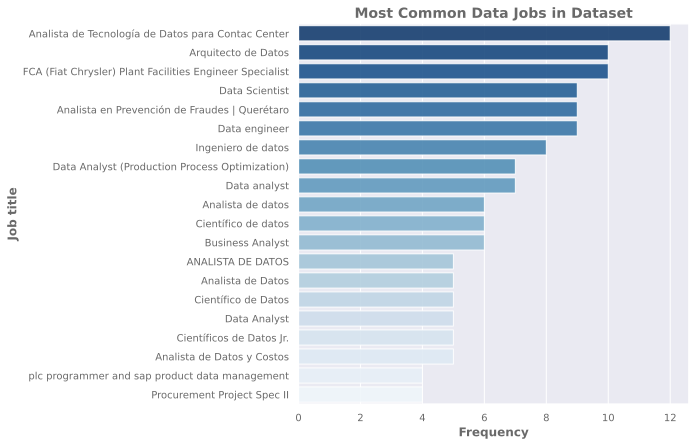

In [ ]:
# Visual exploration of the Job variable (top 20)
fig, ax = plt.subplots(figsize = (7, 7))
sns.barplot(x = df['Job'].value_counts().values[0:20], y= df['Job'].value_counts().index[0:20], palette="Blues_r", alpha = 0.9)
plt.xlabel('Frequency')
plt.ylabel('Job title')
plt.title('Most Common Data Jobs in Dataset')
plt.show()

It appears that **_Analista de Tecnología de Datos para Contact Center_** is the most demanded position, followed by **_Arquitecto de datos_** and **_FCA (Fiat Chrysler) Plant Facilities Engineer Specialist_**.

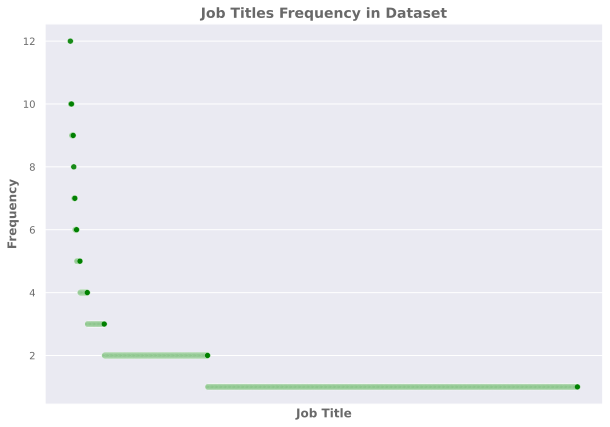

In [ ]:
# Visual exploration of the Job variable
fig, ax = plt.subplots(figsize = (10, 7))
sns.scatterplot(x = df['Job'].unique(), y= df['Job'].value_counts(), color="Green", alpha = 0.9)
plt.xticks([])
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.title('Job Titles Frequency in Dataset')
plt.show()

The plot above shows that the largest part of the job titles retrieved from the web scraping are **unique values**. Thus, this suggests that the job titles variable is fairly inconsistent and/or it exhibits a lot of other positions which are not of interest for this study.

In [ ]:
df['Location'].value_counts()

CDMX                                       289
Monterrey, N.L.                             95
Guadalajara, Jal.                           55
Miguel Hidalgo, CDMX                        51
Querétaro, Qro.                             33
                                          ... 
San José Iturbide, Gto.                      1
El Derramadero, Saltillo, Coah.              1
Tab.                                         1
Metepec, Edo. Méx.​                          1
Polanco V Sección, Miguel Hidalgo, CDMX      1
Name: Location, Length: 181, dtype: int64

**CDMX** is by far the location where most of the data jobs are demanded.

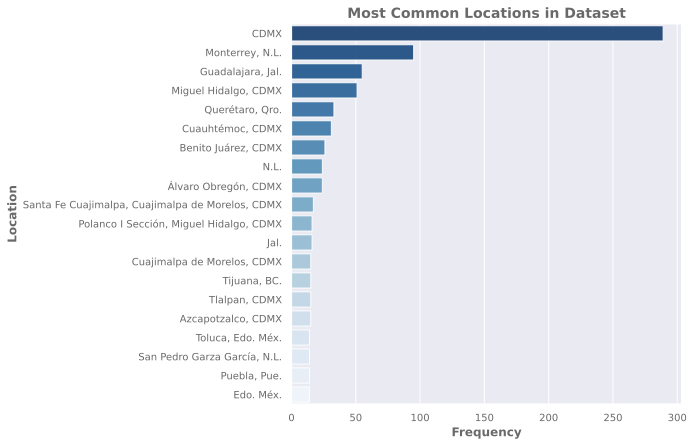

In [ ]:
# Visual exploration of the Location variable (top 20)
fig, ax = plt.subplots(figsize = (7, 7))
sns.barplot(x = df['Location'].value_counts().values[0:20], y= df['Location'].value_counts().index[0:20], palette="Blues_r", alpha = 0.9)
plt.xlabel('Frequency')
plt.ylabel('Location')
plt.title('Most Common Locations in Dataset')
plt.show()

Some states appear with its full name and some with its abbreviation. In Furthermore, in some cases, only the name of the state appears while in others the name of the municipality is also included.

Notwithstanding with the above, it is clear that **CDMX (Mexico City)** is the location where **the most data jobs are demanded**.

In [ ]:
# Value counts for each company
df['Company'].value_counts()

Manpower, S.A. de C.V.       46
SIEMENS SA DE CV             28
Grupo Salinas                25
Atento Servicios, S. A...    24
Softtek                      16
                             ..
Universidad Tecnologic...     1
SERVICIOS FULTRA SA DE...     1
JLL ENGINEERING SERVICES      1
Bayer de México               1
Eaton Corporation             1
Name: Company, Length: 439, dtype: int64

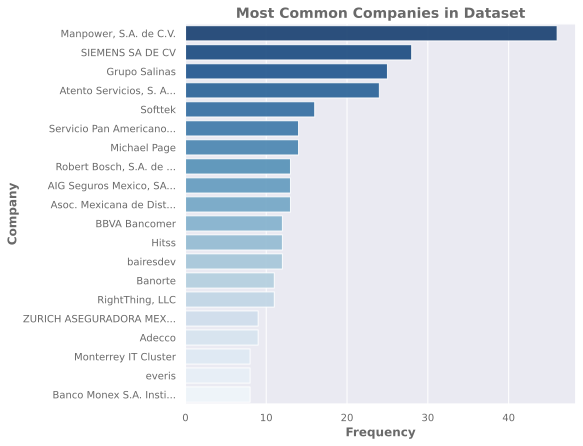

In [ ]:
# Visual exploration of the Company variable (top 20)
fig, ax = plt.subplots(figsize = (7, 7))
sns.barplot(x = df['Company'].value_counts().values[0:20], y= df['Company'].value_counts().index[0:20], palette="Blues_r", alpha = 0.9)
plt.xlabel('Frequency')
plt.ylabel('Company')
plt.title('Most Common Companies in Dataset')
plt.show()

**_Manpower_** is the company with **the highest number of data jobs vacancies**. It is followed by **_Siemens_**, **_Grupo Salinas_** and **_Atento Servicios_**.

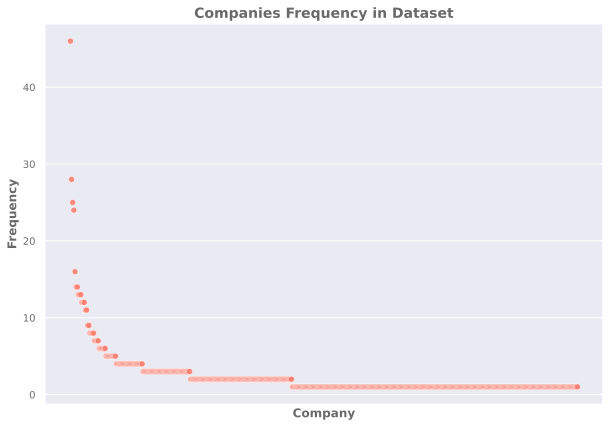

In [ ]:
# Visual exploration of the Company variable
fig, ax = plt.subplots(figsize = (10, 7))
sns.scatterplot(x = df['Company'].value_counts().index, y= df['Company'].value_counts().values, color="Salmon", alpha = 0.9)
plt.xticks([])
plt.xlabel('Company', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Companies Frequency in Dataset', fontsize=14, fontweight='bold')
plt.show()

The plot above shows that most companies only offer **one or two** data-related positions.

In [ ]:
# Value counts for each Salary
df['Salary'].value_counts()

Sueldo no mostrado por la empresa    655
$15,000  Mensual                      30
$20,000 - $25,000  Mensual            24
$7,600 - $9,000  Mensual              12
$15,000 - $18,000  Mensual            12
                                    ... 
$35,000 - $36,000  Mensual             1
$80,000 - $95,000  Mensual             1
$63,000 - $64,000  Mensual             1
$80,000 - $85,000  Mensual             1
$15,000 - $15,500  Mensual             1
Name: Salary, Length: 249, dtype: int64

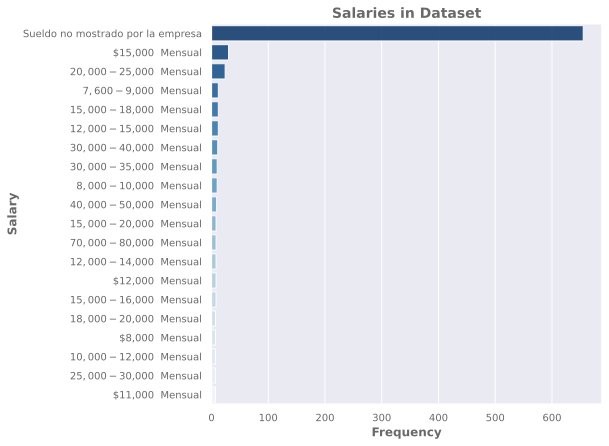

In [ ]:
# Visual exploration of the Company variable (top 20)
fig, ax = plt.subplots(figsize = (7, 7))
sns.barplot(x = df['Salary'].value_counts().values[0:20], y= df['Salary'].value_counts().index[0:20], palette="Blues_r", alpha = 0.9)
plt.xlabel('Frequency')
plt.ylabel('Salary')
plt.title('Salaries in Dataset')
plt.show()

Obviously, is necessary to clean the data in order to get more meaningful insights regarding the salary. However, it is noteworthy that most of the published vacancies have an undisclosed salary.

For the vacancies that have a disclosed salary, a salary range is most commonly published rather than a single value.

Of course, the periodicity of the payment (_"Mensual"_: monthly) must be removed from all observations.

On the other hand, it "appears" that a salary of about **15,000 MXN** is the most common, which is probably not accurate due to the fact that the salary variable is a string instead of an actual number.